## Lession 3 Notebook - March 06, 2024
### Cosmological Distances

Remember that in flat $\Lambda$CDM the comoving distance is given by $d(z)=\int_0^z\frac{c}{H(z')}dz'$. 

The angular diameter distance is $d_A(z)=d(z)/(1+z)$

The luminosity distance is $d_L(z) = (1+z)^2 d_A(z) = (1+z)d(z)$

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.relpath('/Users/edoardo/AstroCosmoComputational/Students'))          

#needed for importing modules which are not in the same directory as the file, 
#nor installed with pip

In [3]:
from pyACC.cosmology import distances

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Cosmological distances in $\Lambda$ CDM cosmology

In [5]:
def H(z, Om_m, H0):
    return H0*np.sqrt(Om_m*(1+z)**3+(1-Om_m))

In [6]:
z=np.arange(0,2,0.01)+0.01/2

In [7]:
args={"Om_m":0.319, "H0":67, "Om_r":0.0,"w": -1.1}

In [8]:
## construct a CosmologicalDistances class instance
cosmo_dist=distances.CosmologicalDistances(H, H0=args['H0'], Om_m=args['Om_m'])

In [9]:
d=cosmo_dist.comoving_distance(z)
d_A = cosmo_dist.angular_diameter_distance(z)
d_L = cosmo_dist.luminosity_distance(z)

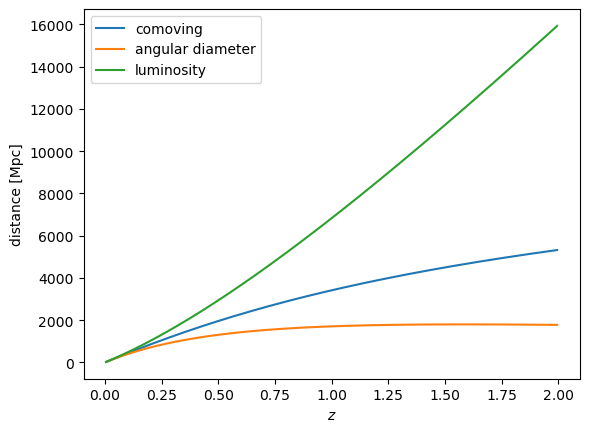

In [10]:
plt.plot(z,d, label='comoving')
plt.plot(z,d_A, label='angular diameter')
plt.plot(z, d_L, label='luminosity')
plt.xlabel('$z$')
plt.ylabel('distance [Mpc]')
plt.legend()

Text(0, 0.5, '$\\mu$ [mag]')

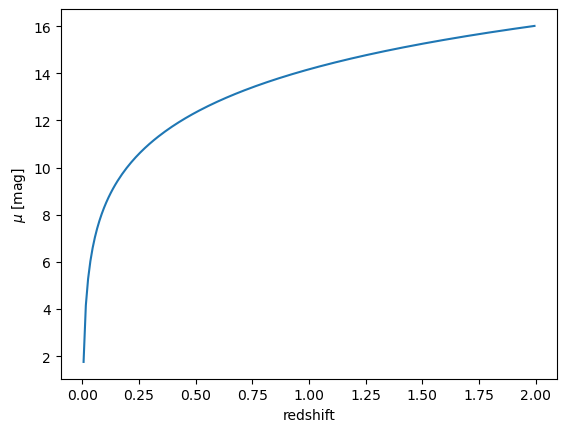

In [11]:
plt.plot(z, cosmo_dist.distance_modulus_from_redshift(z))
plt.xlabel('redshift')
plt.ylabel(r'$\mu$ [mag]')

### Cosmological Distances in wCDM

In [12]:
def H_w(z, H0, Om_m, Om_r, w): 
    return H0*np.sqrt(Om_m*(1+z)**3+Om_r*(1+z)**4+(1-Om_m-Om_r)*(1+z)**(3*(1+w)))

In [13]:
cosmo_dist_w=distances.CosmologicalDistances(H_w, H0=args['H0'], Om_m=args['Om_m'], Om_r=args['Om_r'], w=args['w'])


Text(0, 0.5, '$d_L$')

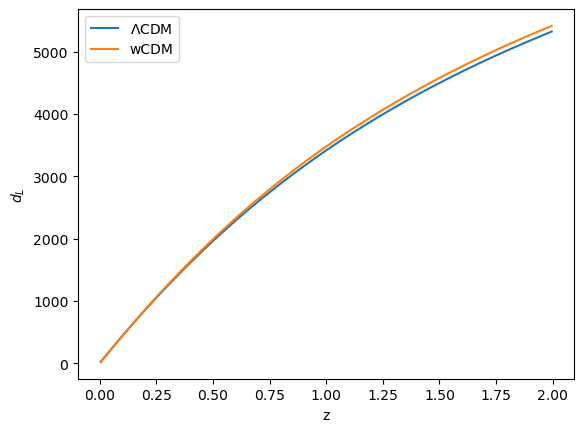

In [14]:
plt.plot(z, cosmo_dist.comoving_distance(z), label=r'$\Lambda$CDM')
plt.plot(z, cosmo_dist_w.comoving_distance(z), label='wCDM')
plt.legend()
plt.xlabel('z')
plt.ylabel('$d_L$')

In [15]:
def save_arrays_to_file(array1, array2, array3, filename):
    # Stack arrays horizontally
    stacked_arrays = np.column_stack((array1, array2, array3))
    column_names = "z\tdc_LCDM\tdc_wCDM"
    # Save stacked arrays to text file
    np.savetxt(filename, stacked_arrays, fmt='%s', header=column_names, delimiter='\t')


In [16]:
save_arrays_to_file(z,cosmo_dist.comoving_distance(z), cosmo_dist_w.comoving_distance(z), 'comoving_distances.txt')

## Pantheon+ data

In [17]:
pantheon_data=pd.read_csv('/Users/edoardo/AstroCosmoComputational/DataRelease/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', delimiter=' ')

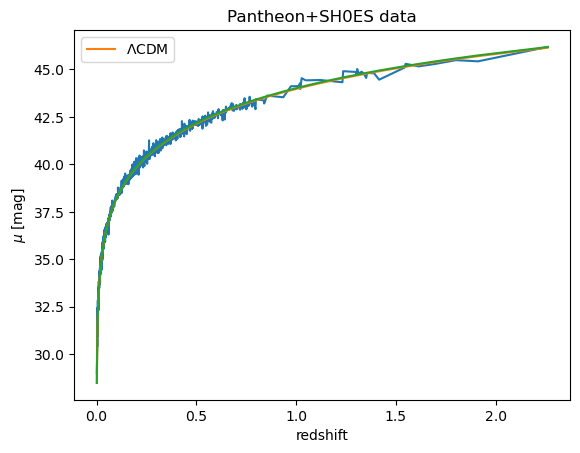

In [18]:
plt.plot(pantheon_data['zHD'], pantheon_data['MU_SH0ES'])
plt.title('Pantheon+SH0ES data')
plt.xlabel('redshift')
plt.ylabel('$\mu$ [mag]')

plt.plot(pantheon_data['zHD'], 29.8+cosmo_dist.distance_modulus_from_redshift(pantheon_data['zHD']), label='$\Lambda$CDM')
plt.legend()

plt.plot(pantheon_data['zHD'], 29.8+cosmo_dist_w.distance_modulus_from_redshift(pantheon_data['zHD']), label='wCDM')

## cosmology controls the tilt of the curve. 
## There is a free additive term that must be marginalized.

Text(0.5, 0, 'redshift')

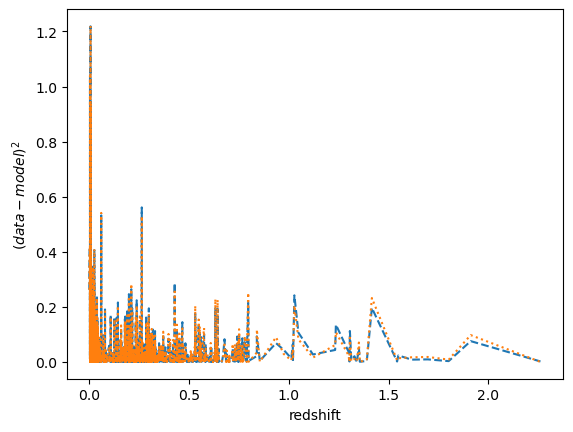

In [19]:
plt.plot(pantheon_data['zHD'],(pantheon_data['MU_SH0ES']-(29.8+cosmo_dist.distance_modulus_from_redshift(pantheon_data['zHD'])))**2, linestyle='--', label='$Lambda$CDM')
plt.plot(pantheon_data['zHD'],(pantheon_data['MU_SH0ES']-(29.8+cosmo_dist_w.distance_modulus_from_redshift(pantheon_data['zHD'])))**2, linestyle=':', label='wCDM')
plt.ylabel('$(data-model)^2$')
plt.xlabel('redshift')